In [1]:
import pandas as pd
import ants
import os
from tqdm import tqdm
import numpy as np
from helper_funcs import get_triu

In [2]:
df = pd.read_csv('../Data/comb_df.csv')
df = df.iloc[df['dataset'].values=='ABIDE I']
df

,Unnamed: 0,participant_id,diag,age,sex,fiq,site,DSMIV,ados_total,ados_social,ados_comm,ados_rrb,dataset
0,0,50002,1,16.77,1,103.0,13,1.0,12.0,8.0,4.0,3.0,ABIDE I
1,2,50004,1,19.09,1,113.0,13,1.0,18.0,12.0,6.0,2.0,ABIDE I
2,3,50005,1,13.73,2,119.0,13,1.0,12.0,8.0,4.0,1.0,ABIDE I
3,4,50006,1,13.37,1,109.0,13,1.0,12.0,8.0,4.0,4.0,ABIDE I
4,9,50011,1,16.93,1,111.0,13,1.0,13.0,9.0,4.0,NaN,ABIDE I
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,1040,51580,1,42.00,1,NaN,14,3.0,9.0,6.0,3.0,NaN,ABIDE I
843,1042,51582,1,31.00,1,NaN,14,2.0,9.0,7.0,2.0,NaN,ABIDE I
844,1043,51583,1,35.00,1,95.0,14,2.0,NaN,NaN,NaN,NaN,ABIDE I
845,1045,51585,1,27.00,1,96.0,14,1.0,NaN,NaN,NaN,NaN,ABIDE I


In [3]:
subs = df['participant_id'].values

100%|██████████| 847/847 [00:26<00:00, 32.16it/s]  


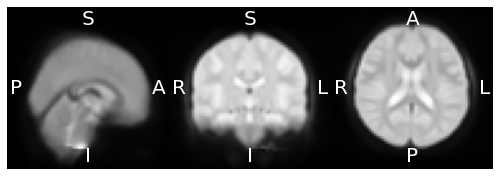

0.8990552793141071


In [4]:
fn_temp = '~/data/ABIDE/Derivatives/fmriprep3/sub-00{sub}/func/sub-00{sub}_task-rest_run-1_space-MNI152NLin2009cAsym_res-2_boldref.nii.gz'
fn_temp = os.path.expanduser(fn_temp)
ims = [ants.image_read(fn_temp.format(sub=sub)).resample_image(resample_params=(64,64,64), use_voxels=True, interp_type=4) for sub in tqdm(subs) if os.path.exists(fn_temp.format(sub=sub))]
ims[0].new_image_like(np.array([im.numpy() for im in ims]).mean(axis=0)).plot_ortho(flat=True,xyz_lines=False)
print(get_triu(np.corrcoef(np.array([im.numpy().flatten() for im in ims]))).mean())

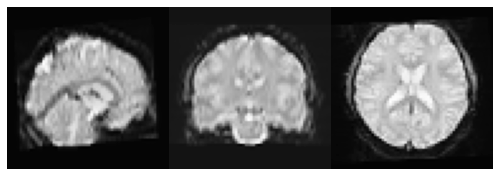

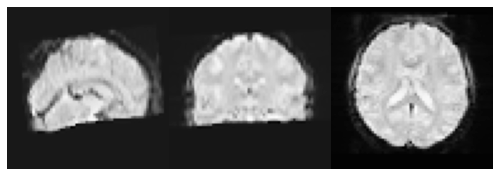

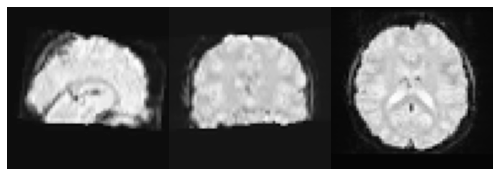

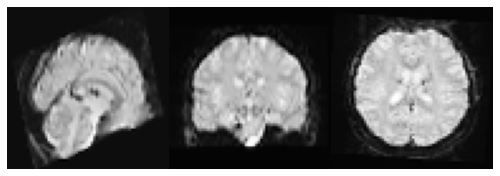

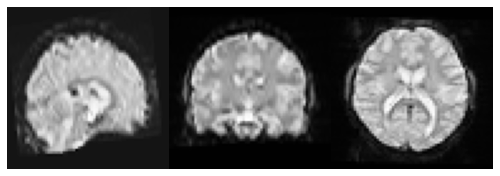

In [12]:
sample = np.arange(0,5)
for i in sample:
    ims[sample[i]].plot_ortho(flat=True,xyz_lines=False,orient_labels=False)

100%|██████████| 847/847 [00:48<00:00, 17.34it/s]


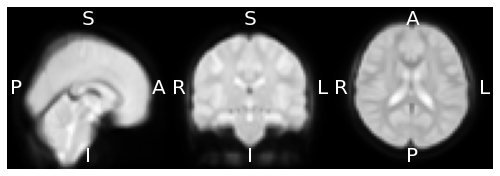

0.9028897850816313


In [13]:
fn_temp = '~/data/ABIDE/Derivatives/fmriprep/fmriprep/sub-00{sub}/func/sub-00{sub}_task-rest_run-1_space-MNI152NLin2009cAsym_boldref.nii.gz'
fn_temp = os.path.expanduser(fn_temp)
ims = [ants.image_read(fn_temp.format(sub=sub)).resample_image(resample_params=(64,64,64), use_voxels=True, interp_type=4) for sub in tqdm(subs) if os.path.exists(fn_temp.format(sub=sub))]
ims[0].new_image_like(np.array([im.numpy() for im in ims]).mean(axis=0)).plot_ortho(flat=True,xyz_lines=False)
print(get_triu(np.corrcoef(np.array([im.numpy().flatten() for im in ims]))).mean())

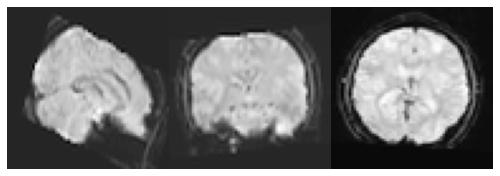

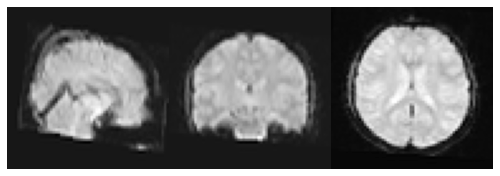

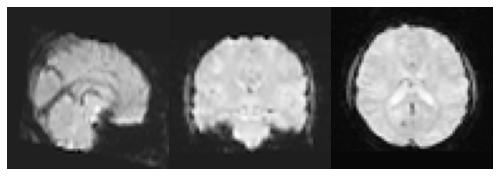

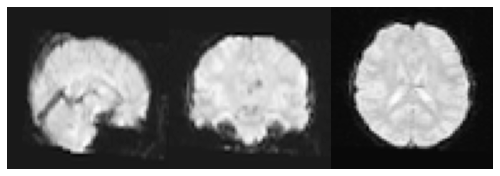

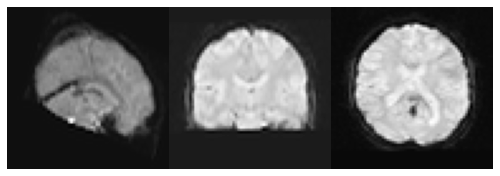

In [14]:
sample = np.arange(0,5)
for i in sample:
    ims[sample[i]].plot_ortho(flat=True,xyz_lines=False,orient_labels=False)

In [20]:
epi_fn = '~/data/ABIDE/Derivatives/fmriprep/fmriprep/sub-00{sub}/func/sub-00{sub}_task-rest_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
bold_ref = '~/data/ABIDE/Derivatives/fmriprep/fmriprep/sub-00{sub}/func/sub-00{sub}_task-rest_run-1_space-MNI152NLin2009cAsym_boldref.nii.gz'

In [27]:
sub = str(subs[10])
epi = ants.image_read(os.path.expanduser(epi_fn.format(sub=sub)))
ref = ants.image_read(os.path.expanduser(bold_ref.format(sub=sub)))

sub = str(subs[0])
epi2 = ants.image_read(os.path.expanduser(epi_fn.format(sub=sub)))
ref2 = ants.image_read(os.path.expanduser(bold_ref.format(sub=sub)))

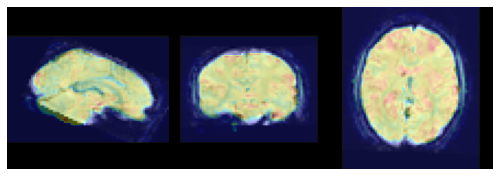

In [29]:
ref.plot_ortho(ref2,flat=True,xyz_lines=False,orient_labels=False,overlay_alpha=.3)

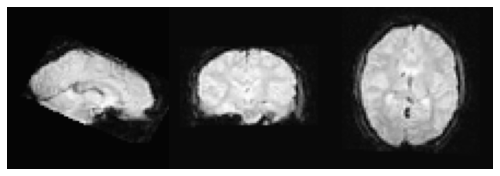

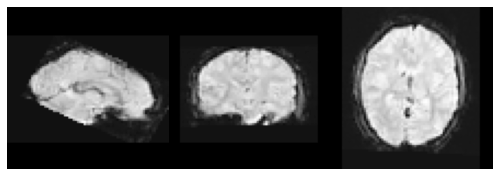

In [26]:
ants.slice_image(epi,axis=3,idx=0).plot_ortho(flat=True,xyz_lines=False,orient_labels=False)
ref.plot_ortho(flat=True,xyz_lines=False,orient_labels=False)